<a href="https://colab.research.google.com/github/XiaoLiang28/Datamanagement/blob/main/ps5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set Up

In [2]:
#---------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now:
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl

from google.colab import files

#import webbrowser

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections])

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib
#%matplotlib --list
#interactive plots:
#%matplotlib notebook
#static images of your plot:
%matplotlib inline
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;)
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

# Data Import

In [3]:
hdi=pd.read_excel("https://github.com/XiaoLiang28/Datamanagement/raw/main/Human%20Development%20Index(1)%20(1).xlsx")

In [4]:
hdi = hdi.drop(['Unnamed: 3', 'Unnamed: 5', 'Unnamed: 7', 'Unnamed: 9', 'Unnamed: 11'], axis=1)

In [28]:
hdi.rename(columns={'Country ':'Country', 'Human Development Index (HDI) ':'HDI'},inplace=True)

In [29]:
hdi

,HDI Rank,Country,HDI,Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,Human Development
0,1,Switzerland,0.962,83.9872,16.500299,13.859660,66933.004540,Very High
1,2,Norway,0.961,83.2339,18.185200,13.003630,64660.106220,Very High
2,3,Iceland,0.959,82.6782,19.163059,13.767170,55782.049810,Very High
3,4,"Hong Kong, China (SAR)",0.952,85.4734,17.278170,12.226210,62606.845400,Very High
4,5,Australia,0.951,84.5265,21.054590,12.726820,49238.433350,Very High
...,...,...,...,...,...,...,...,...
186,187,Burundi,0.426,61.6627,10.722722,3.129267,731.786709,Low
187,188,Central African Republic,0.404,53.8947,8.040172,4.334000,966.058611,Low
188,189,Niger,0.400,61.5763,6.957112,2.116717,1239.866936,Low
189,190,Chad,0.394,52.5254,8.035914,2.573774,1364.169417,Low


In [30]:
hdi.columns

Index(['HDI Rank', 'Country', 'HDI', 'Life expectancy at birth',
       'Expected years of schooling', 'Mean years of schooling',
       'Gross national income (GNI) per capita', 'Human Development'],
      dtype='object')

## 1. General discription of the dataset

In [31]:
print(hdi.head())

   HDI Rank                 Country    HDI  Life expectancy at birth  \
0         1             Switzerland  0.962                   83.9872   
1         2                  Norway  0.961                   83.2339   
2         3                 Iceland  0.959                   82.6782   
3         4  Hong Kong, China (SAR)  0.952                   85.4734   
4         5               Australia  0.951                   84.5265   

   Expected years of schooling  Mean years of schooling  \
0                    16.500299                 13.85966   
1                    18.185200                 13.00363   
2                    19.163059                 13.76717   
3                    17.278170                 12.22621   
4                    21.054590                 12.72682   

   Gross national income (GNI) per capita Human Development  
0                             66933.00454         Very High  
1                             64660.10622         Very High  
2                         

In [32]:
print(hdi.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   HDI Rank                                191 non-null    int64  
 1   Country                                 191 non-null    object 
 2   HDI                                     191 non-null    float64
 3   Life expectancy at birth                191 non-null    float64
 4   Expected years of schooling             191 non-null    float64
 5   Mean years of schooling                 191 non-null    float64
 6   Gross national income (GNI) per capita  191 non-null    float64
 7   Human Development                       191 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 12.1+ KB
None


In [33]:
print(hdi.describe())

         HDI Rank         HDI  Life expectancy at birth  \
count  191.000000  191.000000                 191.00000   
mean    95.811518    0.720576                  71.31286   
std     55.307333    0.150661                   7.64596   
min      1.000000    0.385000                  52.52540   
25%     48.500000    0.599500                  65.74720   
50%     96.000000    0.739000                  71.69400   
75%    143.500000    0.835000                  76.69930   
max    191.000000    0.962000                  85.47340   

       Expected years of schooling  Mean years of schooling  \
count                   191.000000               191.000000   
mean                     13.534658                 8.986916   
std                       2.923911                 3.173693   
min                       5.542510                 2.114962   
25%                      11.601258                 6.251659   
50%                      13.404920                 9.306864   
75%                      15

In [34]:
print(hdi.shape)

(191, 8)


In [35]:
best_hdi = hdi[hdi['HDI Rank'] == hdi['HDI Rank'].min()][['Country', 'HDI Rank']]
worst_hdi = hdi[hdi['HDI Rank'] == hdi['HDI Rank'].max()][['Country', 'HDI Rank']]
best_hdi
worst_hdi

,Country,HDI Rank
0,Switzerland,1


,Country,HDI Rank
190,South Sudan,191


## 2. Data analyze

### Standard deviations

In [36]:
variables = ['Life expectancy at birth', 'Expected years of schooling', 'Mean years of schooling', 'Gross national income (GNI) per capita']

In [37]:
std_dev = hdi[variables].std()

In [38]:
print(std_dev)

Life expectancy at birth                      7.645960
Expected years of schooling                   2.923911
Mean years of schooling                       3.173693
Gross national income (GNI) per capita    21825.277076
dtype: float64


### Correlations

In [39]:
corr_hdi=hdi.select_dtypes(include=[np.number])

In [44]:
corr=corr_hdi.corr()['HDI'].drop('HDI')
print(corr)

HDI Rank                                 -0.992091
Life expectancy at birth                  0.905964
Expected years of schooling               0.895600
Mean years of schooling                   0.909126
Gross national income (GNI) per capita    0.788036
Name: HDI, dtype: float64


### OLS Model

In [48]:
import statsmodels.api as sm

In [56]:
dependent = 'HDI'
independent = ['Life expectancy at birth', 'Expected years of schooling', 'Mean years of schooling',
                    'Gross national income (GNI) per capita']

In [57]:
x = hdi['dependent']
y = hdi['independent']
x = sm.add_constant(x)
result = sm.OLS(y, x).fit()
print(result.summary())

KeyError: ignored

## Visualization

<ipython-input-54-26759cc2244d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = hdi.corr()


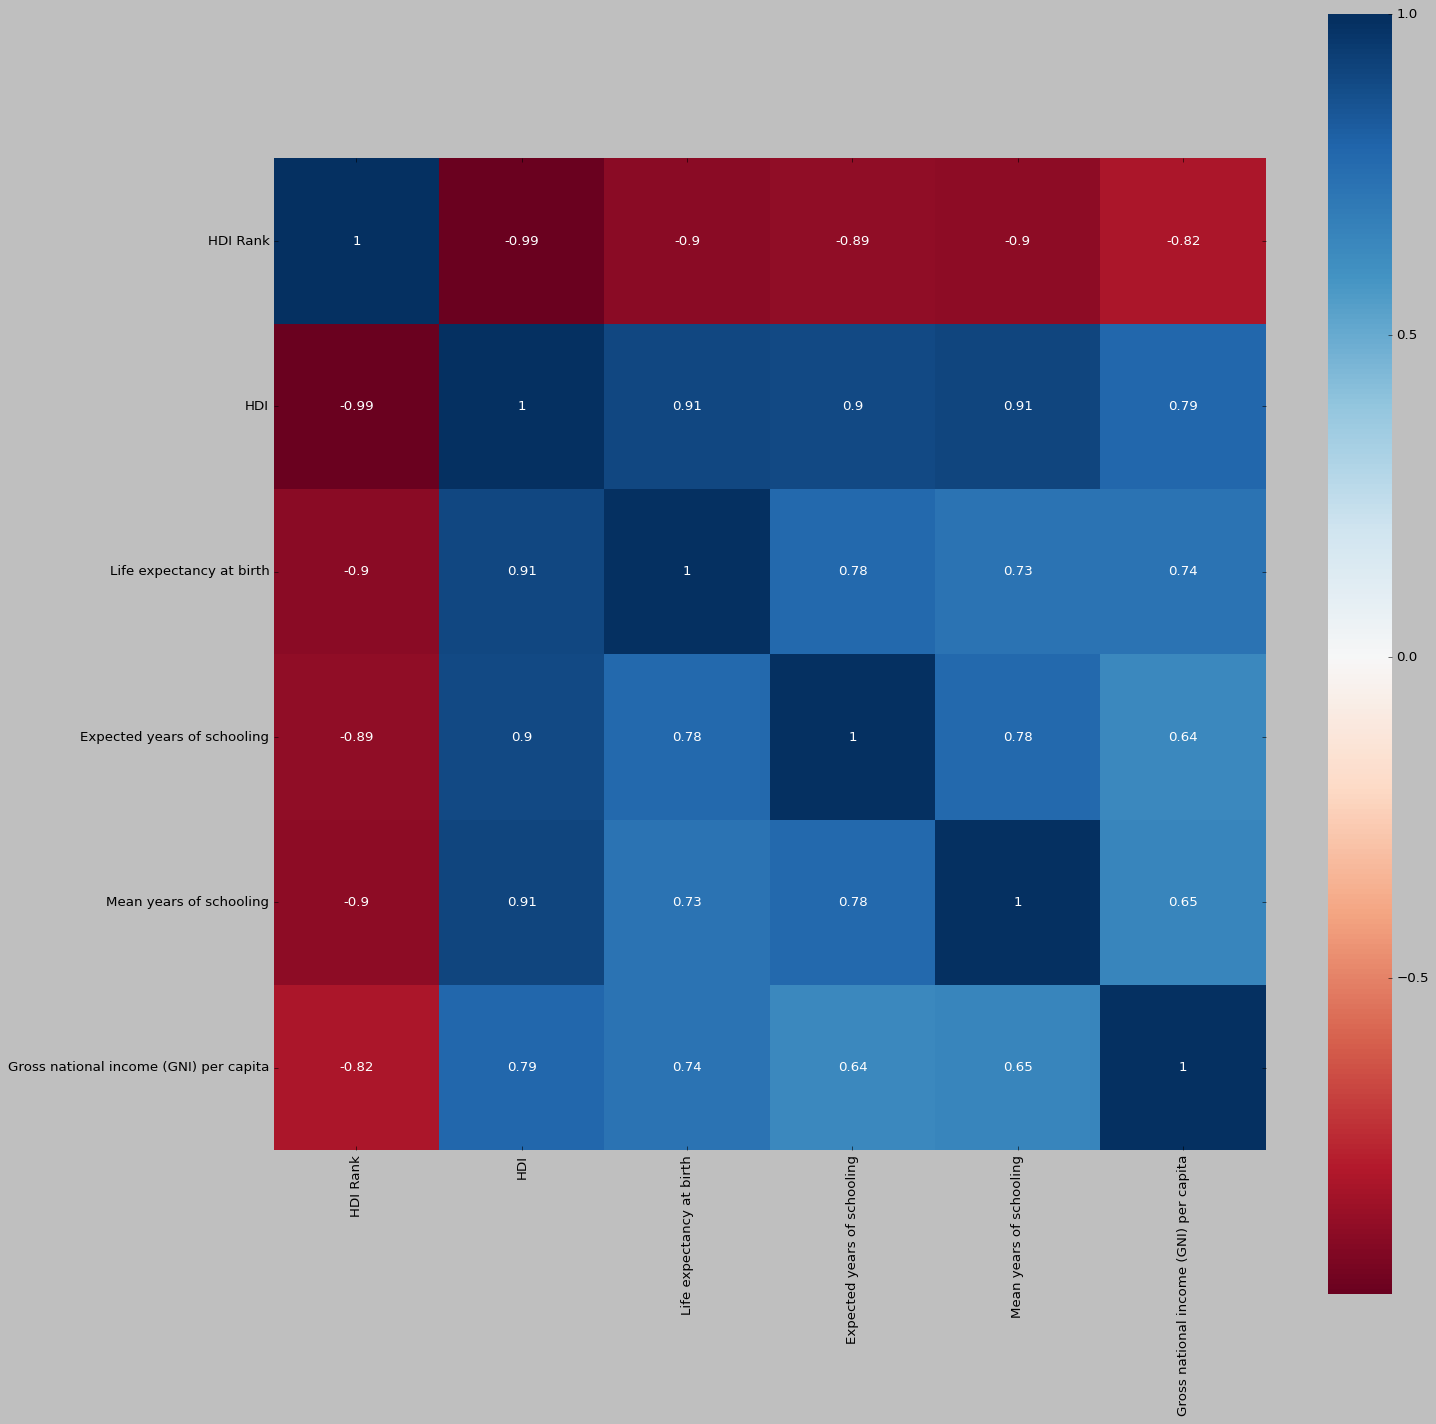

In [54]:
import seaborn as sns

corrmat = hdi.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(corrmat, cmap = "RdBu", square = True, annot = True, center = 0);

In [61]:
for var in independent:
    plt.figure(figsize=(6, 5))


<Figure size 480x400 with 0 Axes>

<Figure size 480x400 with 0 Axes>

<Figure size 480x400 with 0 Axes>

<Figure size 480x400 with 0 Axes>

<Figure size 480x400 with 0 Axes>

<Figure size 480x400 with 0 Axes>

<Figure size 480x400 with 0 Axes>

<Figure size 480x400 with 0 Axes>